In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression

In [40]:
train=pd.read_csv("titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
y=train['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [44]:
x=train[['Pclass']]
x.head()

,Pclass
0,3
1,1
2,3
3,1
4,3


In [45]:
X_train, X_test, y_train, y_test=train_test_split(x,y)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

68.560000000000002

In [56]:
predictions = logreg.predict_proba(X_test) 
predictions

array([[ 0.76408638,  0.23591362],
       [ 0.58638564,  0.41361436],
       [ 0.76408638,  0.23591362],
       [ 0.76408638,  0.23591362],
       [ 0.38293056,  0.61706944],
       [ 0.58638564,  0.41361436],
       [ 0.76408638,  0.23591362],
       [ 0.76408638,  0.23591362],
       [ 0.58638564,  0.41361436],
       [ 0.38293056,  0.61706944],
       [ 0.76408638,  0.23591362],
       [ 0.58638564,  0.41361436],
       [ 0.38293056,  0.61706944],
       [ 0.76408638,  0.23591362],
       [ 0.76408638,  0.23591362],
       [ 0.76408638,  0.23591362],
       [ 0.76408638,  0.23591362],
       [ 0.76408638,  0.23591362],
       [ 0.38293056,  0.61706944],
       [ 0.38293056,  0.61706944],
       [ 0.76408638,  0.23591362],
       [ 0.58638564,  0.41361436],
       [ 0.76408638,  0.23591362],
       [ 0.76408638,  0.23591362],
       [ 0.38293056,  0.61706944],
       [ 0.76408638,  0.23591362],
       [ 0.76408638,  0.23591362],
       [ 0.58638564,  0.41361436],
       [ 0.38293056,

In [50]:
precisions = cross_val_score(logreg, X_train, y_train, cv=5, scoring='precision')
print('Precision', np.mean(precisions), precisions)

Precision 0.611403592954 [ 0.36666667  0.61764706  0.70967742  0.63888889  0.72413793]


In [51]:
recalls = cross_val_score(logreg, X_train, y_train, cv=5, scoring='recall')
print('Recalls', np.mean(recalls), recalls)

Recalls 0.399102040816 [ 0.22        0.42857143  0.44897959  0.46938776  0.42857143]


In [52]:
f1s = cross_val_score(logreg, X_train, y_train, cv=5, scoring='f1')
print('F1', np.mean(f1s), f1s)

F1 0.482132421087 [ 0.275       0.5060241   0.55        0.54117647  0.53846154]


In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,Y_pred)
print(cm)

[[109  18]
 [ 58  38]]


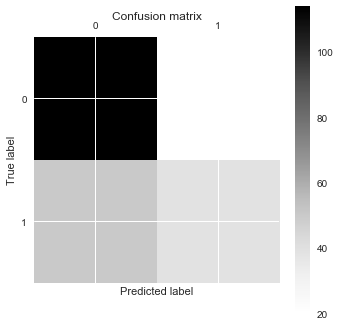

In [38]:
plt.matshow(cm)
plt.title('Confusion matrix') 
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

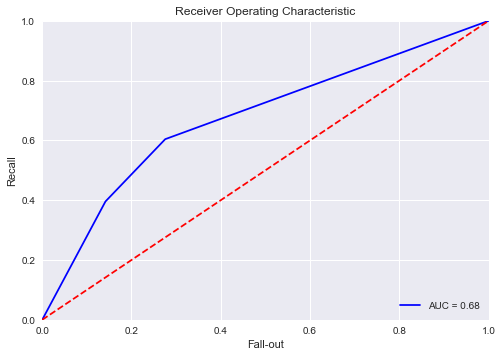

In [57]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()